This is a tutorial for the [```pirel```](https://github.com/giumc/pirel) Python3 module.

```pirel``` stands for PIezoelectric REsonator Layout, and it is based on the module [```phidl```](https://github.com/amccaugh/phidl)


There are ***four*** packages within ```pirel```: ```pcells``` , ```modifiers``` , ```sweeps``` and ```tools``` . Let's start with ```pcells```.

In [1]:
import pirel.pcells as pc

```pcells``` is a collection of classes that are commonly required in piezoelectric resonator design.
all the cells defined here are derived from ```pirel.tools.LayoutPart``` and they share :

* ```name``` attribute 
* ```import_params``` method
* ```export_params``` method
* ```view``` method
* ```draw``` method
* ```get_components``` method

In general, these modules are growing pretty fast in size, so it wouldn't make sense to go through all the pcells/modifiers/sweeps/tools.

Instead, try to ```help(pirel.pcells)```,```help(pirel.tools)``` when you are looking for information!

An example of layout class is the InterDigiTated fingers ```pc.IDT```.

In [2]:
idt=pc.IDT(name='TutorialIDT')

You can get the parameters available to ```idt``` by just printing it!

In [3]:
idt

Name                TutorialIDT
Length                    200.0
Pitch                      20.0
YOffset                    10.0
Coverage                    0.7
N                             4
ActiveAreaMargin            0.5
Type                        IDT
Resistance             2.380952

you can get these parameters in a ```dict``` by using ```export_params```.

you can modify any of the parameters and then import them back in the object.

In [4]:
idt_params=idt.export_params()

idt_params["N"]=4

idt.import_params(idt_params)

idt

Name                TutorialIDT
Length                    200.0
Pitch                      20.0
YOffset                    10.0
Coverage                    0.7
N                             4
ActiveAreaMargin            0.5
Type                        IDT
Resistance             2.380952

At any point, you can visualize the layout cell by calling ```view()```

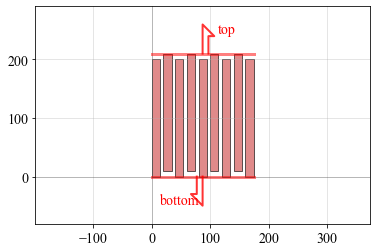

In [5]:
import matplotlib.pyplot as plt
idt.view(blocking=True)

the output is showing a ```phidl.Device``` . These ```Device``` instances are powered up versions of ```gdspy.Cell``` instances.

Refer to [```phidl```](https://github.com/amccaugh/phidl) if you want to learn how many cool things you can do with them.

you can explicitly get this ```Device``` instance by calling the ```draw()``` method.

At that point, you can play around with the cells by using the powerful tools in ```phidl```.

In this example, we will align and distribute two ```idt``` Device using the ```phidl``` module.

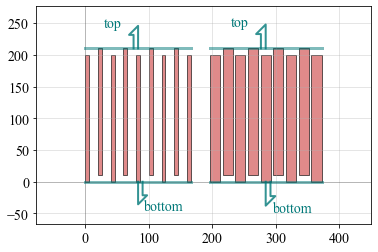

In [6]:
idt.coverage=0.3
cell1=idt.draw()
idt.coverage=0.8 ### yes you can set attributes like this, but you will have to find variable names from typing help(idt)
cell2=idt.draw()

import phidl
import phidl.device_layout as dl
from phidl import quickplot as qp

g=dl.Group([cell1,cell2])
g.distribute(direction='x',spacing=30)
g.align(alignment='y')

cell_tot=phidl.Device()
cell_tot<<cell1
cell_tot<<cell2

qp(cell_tot)

Feel free to look at ```help(pc)``` to figure out all the classes implemented in this module.

Some classes in ``pc`` are created by subclassing , some other by composition of *unit* classes. 
For example, a Lateral Field Excitation RESonator (```pc.LFERes```) is built starting from some components:

* ```pc.IDT```
* ```pc.Bus```
* ```pc.EtchPit```
* ```pc.Anchor```

For any class in ```pc```, you can find components by querying the ```get_components()``` method:

In [7]:
via=pc.Via(name='TutorialVia')
res=pc.LFERes(name='TutorialLFERes')

In [8]:
via.get_components()

{}

In [9]:
res.get_components()

{'IDT': pirel.pcells.IDT,
 'Bus': pirel.pcells.Bus,
 'EtchPit': pirel.pcells.EtchPit,
 'Anchor': pirel.pcells.Anchor}

Note that ```via``` has no components, ```res``` has four.

All layout parameters of each component is also a layout parameter of the composed class.

For example, this is the list of parameters that define ```LFERes```:

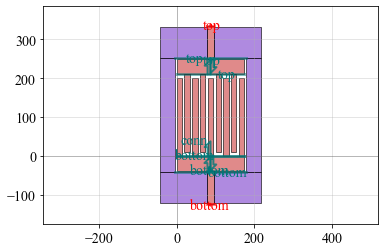

{'IDTLength': 200.0,
 'IDTPitch': 20.0,
 'IDTYOffset': 10.0,
 'IDTCoverage': 0.7,
 'IDTN': 4,
 'IDTLayer': 2,
 'IDTActiveAreaMargin': 0.5,
 'BusLayer': 2,
 'BusSizeY': 40.0,
 'EtchPitX': 40.0,
 'EtchPitLayer': 4,
 'AnchorSizeX': 20.0,
 'AnchorSizeY': 80.0,
 'AnchorMetalizedX': 16.0,
 'AnchorMetalizedY': 84.0,
 'AnchorLayer': 2,
 'AnchorEtchLayer': 4,
 'Name': 'TutorialLFERes',
 'Type': 'LFERes'}

In [10]:
lfe_params=res.export_params()
res.view()
lfe_params

Some classes have also parameters of their own : 
the class ```FBERes``` (Floating Bottom Electrode Resonators) has a parameter that sets the margin of the floating bottom electrode:

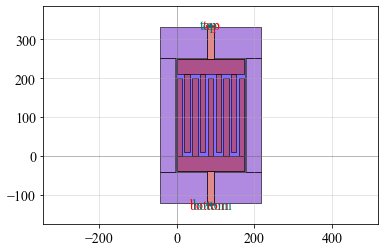

In [11]:
fbe=pc.FBERes(name="TutorialFBE")
params=fbe.export_params();


params["PlatePosition"]='in, long'

fbe.import_params(params)
fbe.view()

If you are bothered by the ```phidl.Port``` labels, just pass the optional ```joined=True``` to the ```check``` method in ```pirel.tools```

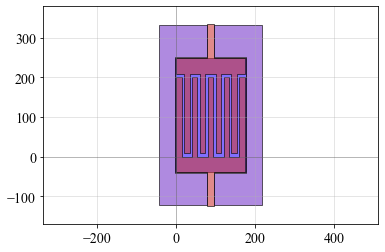

In [12]:
import pirel.tools as pt

fbe_cell=fbe.draw()

pt.check(fbe_cell,joined=True)

Check out the next tutorial on how to power up the ```LayoutPart``` classes using [```pirel.modifiers```](./Tutorial_modifiers.ipynb)